In [2]:
# You can do all of this in the `__main__.py` file, but this file exists
# to shows how to do relative import functions from another python file in
# the same directory as this one.
import numpy as np
from algs import quicksort, bubblesort, insertionsort
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
plt.clf()

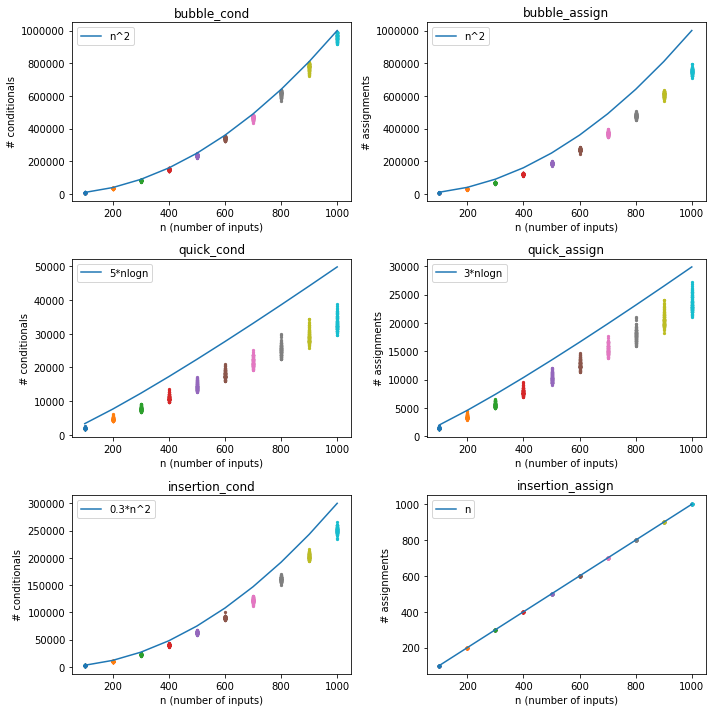

In [20]:
sizes_to_test = np.array([100,200,300,400,500,600,700,800,900,1000])
#sizes_to_test = np.array([100,200,300,400])
data_pages = dict()
columns = ('bubble_cond','bubble_assign','quick_cond','quick_assign','insertion_cond','insertion_assign')
avgs_df = pd.DataFrame(index=sizes_to_test, columns=columns)
plt.figure(figsize=(10,10))
axes = dict()
for i in range(0,len(columns),1):
    axes[columns[i]] = plt.subplot(3,2,i+1)
for size in sizes_to_test:
    data = pd.DataFrame(index=range(0,100,1),columns=columns)
    for i in range(0,100,1):
        x = np.random.rand(size)
        bubble_data = bubblesort(x)
        data['bubble_cond'][i] = bubble_data['c']
        data['bubble_assign'][i] = bubble_data['a']
        quick_data = quicksort(x)
        data['quick_cond'][i] = quick_data['c']
        data['quick_assign'][i] = quick_data['a']
        insertion_data = insertionsort(x)
        data['insertion_cond'][i] = insertion_data['c']
        data['insertion_assign'][i] = insertion_data['a']
    data_pages[size] = data
    for col in columns:
        avgs_df[col][size] = data[col].mean()
    x = [size] * 100
    for ax in axes.keys():
        axes.get(ax).scatter(x,data[ax],s=5)
axes['bubble_cond'].plot(sizes_to_test,sizes_to_test**2,label='n^2')
axes['bubble_assign'].plot(sizes_to_test,sizes_to_test**2,label='n^2')
axes['quick_cond'].plot(sizes_to_test,5*sizes_to_test*np.log2(sizes_to_test),label='5*nlogn')
axes['quick_assign'].plot(sizes_to_test,3*sizes_to_test*np.log2(sizes_to_test),label='3*nlogn')
axes['insertion_cond'].plot(sizes_to_test,0.3*sizes_to_test**2,label='0.3*n^2')
axes['insertion_assign'].plot(sizes_to_test,sizes_to_test,label='n')
for ax in axes.keys():
    axis = axes.get(ax)
    axis.set_title(ax)
    axis.set_xlabel('n (number of inputs)')
    if 'cond' in ax:
        axis.set_ylabel('# conditionals')
    if 'assign' in ax:
        axis.set_ylabel('# assignments')
    axis.legend(loc="upper left")
plt.tight_layout()
plt.show()

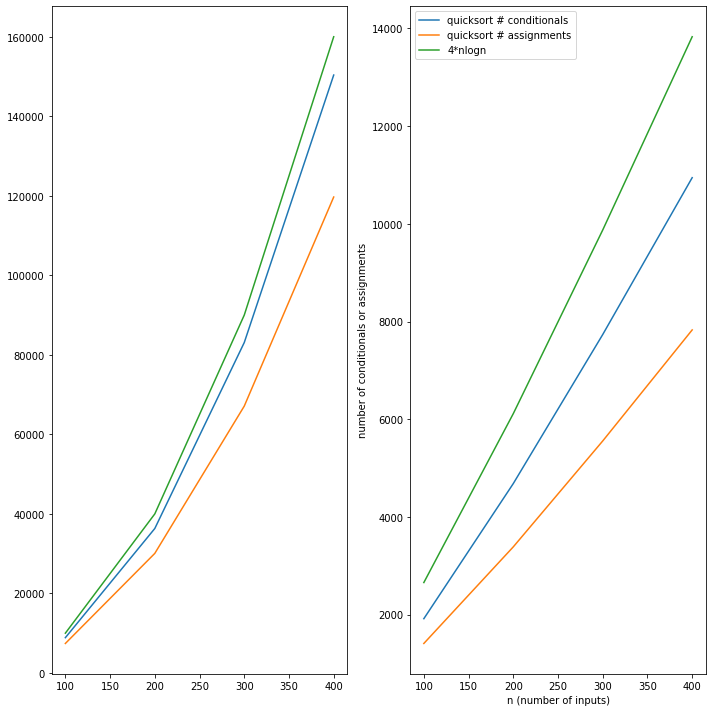

In [18]:
avgs_df['n^2'] = avgs_df.index ** 2
avgs_df['nlogn'] = avgs_df.index * (np.log2(avgs_df.index))
plt.figure(figsize=(10,10))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax.plot(avgs_df.index,avgs_df['bubble_cond'],label='bubblesort # conditionals')
ax.plot(avgs_df.index,avgs_df['bubble_assign'],label='bubblesort # assignments')
ax.plot(avgs_df.index, avgs_df['n^2'],label='n^2')

ax2.plot(avgs_df.index,avgs_df['quick_cond'],label='quicksort # conditionals')
ax2.plot(avgs_df.index,avgs_df['quick_assign'],label='quicksort # assignments')
ax2.plot(avgs_df.index, avgs_df['nlogn']*4,label='4*nlogn')
plt.legend(loc="upper left")
plt.xlabel('n (number of inputs)')
plt.ylabel('number of conditionals or assignments')
plt.tight_layout()
plt.show()